# Projeto Machine Learning I

O objetivo do projeto será desenvolver um estudo baseado em um conjunto de dados (dataset) do [Kaggle](https://www.kaggle.com/).

Como exemplos de datasets temos:
- [Análise de churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)
- [Análise de falha de equipamento](https://www.kaggle.com/datasets/hiimanshuagarwal/predictive-maintenance-dataset)
- [Análise de crédito](https://www.kaggle.com/datasets/rohitudageri/credit-card-details?select=Credit_card_label.csv)
- [Salário em dados](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023)
- [Demanda de bicicletas](https://www.kaggle.com/datasets/joebeachcapital/seoul-bike-sharing)

Para auxiliar no desenvolvimento do projeto, vamos separar em algumas seções, conforme descrito abaixo:

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram an´laises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informações sobre as variáveis em si e suas relações com as demais;

- **Modelagem dos dados**: Nessa parte, deve ser definido o tipo de problema (classificação/regressão). Vocês precisam **treinar pelo menos três (3) modelos** (pode ser testado mais que três modelos distintos) e de acordo com alguma métrica de avaliação (escolhida pelo grupo), decidir qual será o melhor modelo a ser utilizado!;

- __Otimização do Modelo__: A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

## Critérios de Avaliação

Um processo de análise e modelagem de dados depende de diversos fatores, desde quais sementes aleatórias foram definadas até mesmo o desempenho computacional da máquina utlizada. Dessa forma, __não__ será cobrado que resultados os alunos obteram, mas sim o desenvolvimento do projeto, olhando os seguinte tópicos:

- Desenvolvimento mínimo de cada um dos itens acima;

- Padronização de Gráficos, Visualizações e códigos;

- _Clean Code_ e códigos comentados;

- Explicação de todos os processos feitos e decisões tomadas


<br>


## Informações Gerais sobre o Projeto

- O projeto será desenvolvio em grupos;

- Data de Divulgação do Projeto: 09/10/2023;

- Data de Entrega: 25/10/2023;

- Entrega: O grupo deverá apresentar o projeto em aula (10-15 minutos). Além disso o link do github contendo o projeto deve ser encaminhado para posterior avaliação;

<br>

### Informações do grupo
- Nome das pessoas \
Maria Gabrielly Anísio Santana \
Mariah Maria Moreira \
Ingrid Karolynne Alves Soares Guimarães \
Desiree Criswall Mendonça Gomes \
Lucas Cavalcanti Cruz

- Turma \
#1008

- Link do dataset \
Credit card Details Binary Classification Problem \
https://www.kaggle.com/datasets/rohitudageri/credit-card-details/

**Possível roteiro**

**Dados iniciais**
- Explicar o problema a ser resolvido (fraude, churn, previsão, etc). Indicando o problema de negócio (por quê esse dado é interessante?)
- Leitura de dados iniciais

O dataset traz um problema de classificação binária para aprovação de cartão de credito.\
A base dispõe das seguintes colunas:
- Ind_ID: ID do cliente
- Gênero: informações de gênero
- Car_owner: Ter carro ou não
- Proprietário_proprietário: Ter propriedade ou não
- Crianças: contagem de crianças
- Renda_anual: renda anual
- Type_Income: Tipo de renda
- Educação: Nível de escolaridade
- Estado_conjugal: Estado_conjugal
- Housing_type: estilo de vida
- Birthday_count: Use contagem regressiva a partir do dia atual (0), -1 significa ontem.
- Employed_days: Data de início do emprego. Use contagem regressiva a partir do dia atual (0). Valor positivo significa que o indivíduo está atualmente desempregado.
- Mobile_phone: Qualquer telefone celular
- Work_phone: Qualquer telefone comercial
- Telefone: Qualquer número de telefone
- EMAIL_ID: qualquer ID de e-mail
- Tipo_Ocupação: Ocupação
- Family_Members: tamanho da família

Outro conjunto de dados (Credit_card_label.csv) contém duas informações importantes
- ID: A chave de união entre os dados do aplicativo e os dados de status de crédito, a mesma é Ind_ID
- Rótulo: 0 é o aplicativo aprovado e 1 é o aplicativo rejeitado.

**Tratamento dos dados**
- Explicar os motivos dos tratamentos de dados
- Criar funções reutilizáveis e limpas
- Demonstrar os efeitos positivos (ou possíveis melhorias) dessas transformações
- Feature engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick # Biblioteca para formatação do eixo X e Y
import re

In [2]:
bd_data = 'Credit_card.csv'

dados = pd.read_csv(bd_data)
##dados = dados.drop(dados.columns[0], axis=1) #retirando a coluna ID

In [3]:
dados.shape

(1548, 18)

In [4]:
# Função que cria data frames com base em índices de colunas
def cria_df(lista):
    return dados[dados.columns[lista[0]:lista[1]]].copy()

In [5]:
# Função para renomear colunas

def renomeia_coluna_df(data_frame, lista_novos_nomes):
    lista_novos_nomes = [nome.lower() for nome in lista_novos_nomes]
    data_frame.columns = lista_novos_nomes
    return data_frame

In [6]:
df_credit = cria_df([0, 18])
df_credit.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='object')

In [7]:
novos_nomes = ['ID','Genero','Carro','Bens_propriedade','Filhos','Renda_anual','Tipo_renda','Escolaridade','Estado_civil','Estilo_vida','Contar_aniverisario','Desempregado','Celular','Telefone_comercial','Telefone','EMAIL_ID','Tipo_Ocupação','Tamanho_familia']

renomeia_coluna_df(df_credit,novos_nomes)
df_credit.head()

,id,genero,carro,bens_propriedade,filhos,renda_anual,tipo_renda,escolaridade,estado_civil,estilo_vida,contar_aniverisario,desempregado,celular,telefone_comercial,telefone,email_id,tipo_ocupação,tamanho_familia
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [8]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1548 non-null   int64  
 1   genero               1541 non-null   object 
 2   carro                1548 non-null   object 
 3   bens_propriedade     1548 non-null   object 
 4   filhos               1548 non-null   int64  
 5   renda_anual          1525 non-null   float64
 6   tipo_renda           1548 non-null   object 
 7   escolaridade         1548 non-null   object 
 8   estado_civil         1548 non-null   object 
 9   estilo_vida          1548 non-null   object 
 10  contar_aniverisario  1526 non-null   float64
 11  desempregado         1548 non-null   int64  
 12  celular              1548 non-null   int64  
 13  telefone_comercial   1548 non-null   int64  
 14  telefone             1548 non-null   int64  
 15  email_id             1548 non-null   i

In [9]:
df_credit.isnull().sum()

id                       0
genero                   7
carro                    0
bens_propriedade         0
filhos                   0
renda_anual             23
tipo_renda               0
escolaridade             0
estado_civil             0
estilo_vida              0
contar_aniverisario     22
desempregado             0
celular                  0
telefone_comercial       0
telefone                 0
email_id                 0
tipo_ocupação          488
tamanho_familia          0
dtype: int64

In [10]:
df_credit.describe()

,id,filhos,renda_anual,contar_aniverisario,desempregado,celular,telefone_comercial,telefone,email_id,tamanho_familia
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


In [11]:
num_unique_values = df_credit.nunique()

# Conferir o valor de unicos
unique_values_df = pd.DataFrame({'Coluna': num_unique_values.index, 'Valores Únicos': num_unique_values.values})

print(unique_values_df)

                 Coluna  Valores Únicos
0                    id            1548
1                genero               2
2                 carro               2
3      bens_propriedade               2
4                filhos               6
5           renda_anual             115
6            tipo_renda               4
7          escolaridade               5
8          estado_civil               5
9           estilo_vida               6
10  contar_aniverisario            1270
11         desempregado             956
12              celular               1
13   telefone_comercial               2
14             telefone               2
15             email_id               2
16        tipo_ocupação              18
17      tamanho_familia               7


In [12]:
df_credit["genero"].unique()

array(['M', 'F', nan], dtype=object)

In [13]:
df_credit.loc[df_credit["genero"].isnull()] = "Prefiro não informar"

In [14]:
#Média renda Masculino
media_m = df_credit.loc[df_credit["genero"] == "M", "renda_anual"].mean()
media_m = round(media_m, 2)
media_m

222626.83

In [15]:
#Média renda Feminino
media_f = df_credit.loc[df_credit["genero"] == "F", "renda_anual"].mean()
media_f = round(media_f, 2)
media_f

172243.04

In [16]:
#Substituindo a renda anual vazia pela média da renda anual do genero
df_credit.loc[(df_credit["renda_anual"].isnull()) & (df_credit["genero"] == "M"), "renda_anual"] = media_m
df_credit.loc[(df_credit["renda_anual"].isnull()) & (df_credit["genero"] == "F"), "renda_anual"] = media_f

In [17]:
df_credit["tipo_ocupação"].unique()

array([nan, 'Prefiro não informar', 'Core staff', 'Cooking staff',
       'Laborers', 'Sales staff', 'Accountants', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers',
       'High skill tech staff', 'IT staff', 'Waiters/barmen staff',
       'Security staff', 'Medicine staff', 'Private service staff',
       'HR staff', 'Secretaries', 'Realty agents'], dtype=object)

In [18]:
#Substituindo o tipo de ocupação vazio pela tipo "prefiro não informar"
df_credit.loc[(df_credit["tipo_ocupação"].isnull()), "tipo_ocupação"] = "Prefiro não informar"

#Renomeando demais categorias para português
df_credit.loc[(df_credit["tipo_ocupação"]=='Cooking staff'), "tipo_ocupação"] = "Cozinha"
df_credit.loc[(df_credit["tipo_ocupação"]=='Laborers'), "tipo_ocupação"] = "Funcionario"
df_credit.loc[(df_credit["tipo_ocupação"]=='Sales staff'), "tipo_ocupação"] = "Vendas"
df_credit.loc[(df_credit["tipo_ocupação"]=='Accountants'), "tipo_ocupação"] = "Contador"
df_credit.loc[(df_credit["tipo_ocupação"]=='Managers'), "tipo_ocupação"] = "Gerente"
df_credit.loc[(df_credit["tipo_ocupação"]=='Cleaning staff'), "tipo_ocupação"] = "Limpeza"
df_credit.loc[(df_credit["tipo_ocupação"]=='Drivers'), "tipo_ocupação"] = "Motorista"
df_credit.loc[(df_credit["tipo_ocupação"]=='Low-skill Laborers'), "tipo_ocupação"] = "Auxiliar/Aprendiz"
df_credit.loc[(df_credit["tipo_ocupação"]=='High skill tech staff'), "tipo_ocupação"] = "Tech"
df_credit.loc[(df_credit["tipo_ocupação"]=='IT staff'), "tipo_ocupação"] = "TI"
df_credit.loc[(df_credit["tipo_ocupação"]=='Waiters/barmen staff'), "tipo_ocupação"] = "Garçom/Barmen"
df_credit.loc[(df_credit["tipo_ocupação"]=='Security staff'), "tipo_ocupação"] = "Segurança"
df_credit.loc[(df_credit["tipo_ocupação"]=='Medicine staff'), "tipo_ocupação"] = "Medicina"
df_credit.loc[(df_credit["tipo_ocupação"]=='Private service staff'), "tipo_ocupação"] = "Serviço Privado"
df_credit.loc[(df_credit["tipo_ocupação"]=='HR staff'), "tipo_ocupação"] = "RH"
df_credit.loc[(df_credit["tipo_ocupação"]=='Secretaries'), "tipo_ocupação"] = "Secretária"
df_credit.loc[(df_credit["tipo_ocupação"]=='Realty agents'), "tipo_ocupação"] = "Imobiliaria"

In [19]:
df_credit["tipo_renda"].unique()

array(['Pensioner', 'Commercial associate', 'Prefiro não informar',
       'Working', 'State servant'], dtype=object)

In [20]:
#Renomeando categoria tipo de renda para português
df_credit.loc[(df_credit["tipo_renda"]=='Pensioner'), "tipo_renda"] = "Pensionista"
df_credit.loc[(df_credit["tipo_renda"]=='Commercial associate'), "tipo_renda"] = "Associado Comercial"
df_credit.loc[(df_credit["tipo_renda"]=='Working'), "tipo_renda"] = "CLT/PJ"
df_credit.loc[(df_credit["tipo_renda"]=='State servant'), "tipo_renda"] = "Servidor do Estado"

In [21]:
df_credit["escolaridade"].unique()

array(['Higher education', 'Prefiro não informar',
       'Secondary / secondary special', 'Lower secondary',
       'Incomplete higher', 'Academic degree'], dtype=object)

In [22]:
#Renomeando categoria escolaridade para português
df_credit.loc[(df_credit["escolaridade"]=='Higher education'), "escolaridade"] = "Ensino superior"
df_credit.loc[(df_credit["escolaridade"]=='Secondary / secondary special'), "escolaridade"] = "Ensino medio"
df_credit.loc[(df_credit["escolaridade"]=='Lower secondary'), "escolaridade"] = "Ensino fundamental"
df_credit.loc[(df_credit["escolaridade"]=='Incomplete higher'), "escolaridade"] = "Superior incompleto"
df_credit.loc[(df_credit["escolaridade"]=='Academic degree'), "escolaridade"] = "Licenciatura"


In [23]:
df_credit["estado_civil"].unique()

array(['Married', 'Prefiro não informar', 'Single / not married',
       'Civil marriage', 'Separated', 'Widow'], dtype=object)

In [24]:
#Renomeando categoria estado civil para português
df_credit.loc[(df_credit["estado_civil"]=='Married'), "estado_civil"] = "Casado"
df_credit.loc[(df_credit["estado_civil"]=='Single / not married'), "estado_civil"] = "Solteiro"
df_credit.loc[(df_credit["estado_civil"]=='Civil marriage'), "estado_civil"] = "Uniao Estavel"
df_credit.loc[(df_credit["estado_civil"]=='Separated'), "estado_civil"] = "Divorciado"
df_credit.loc[(df_credit["estado_civil"]=='Widow'), "estado_civil"] = "Viuvo"


In [25]:
df_credit["estilo_vida"].unique()

array(['House / apartment', 'Prefiro não informar', 'With parents',
       'Rented apartment', 'Municipal apartment', 'Co-op apartment',
       'Office apartment'], dtype=object)

In [26]:
#Renomeando categoria estivo de vida para português
df_credit.loc[(df_credit["estilo_vida"]=='House / apartment'), "estilo_vida"] = "Casa/Apartamento"
df_credit.loc[(df_credit["estilo_vida"]=='With parents'), "estilo_vida"] = "Com os pais"
df_credit.loc[(df_credit["estilo_vida"]=='Rented apartment'), "estilo_vida"] = "Apartamento alugado"
df_credit.loc[(df_credit["estilo_vida"]=='Municipal apartment'), "estilo_vida"] = "Apartamento municipal"
df_credit.loc[(df_credit["estilo_vida"]=='Co-op apartment'), "estilo_vida"] = "Apartamento cooperativo"
df_credit.loc[(df_credit["estilo_vida"]=='Office apartment'), "estilo_vida"] = "Apartamento escritório"



In [27]:
#Segunda biblioteca que contem os dados dos ID vs Aprovação de Credito
bd_data2 = 'Credit_card_label.csv'

dados2 = pd.read_csv(bd_data2)

In [28]:
dados2.shape

(1548, 2)

In [29]:
def cria_df2(lista):
    return dados2[dados2.columns[lista[0]:lista[1]]].copy()

df_status = cria_df2([0, 2])
df_status.columns

Index(['Ind_ID', 'label'], dtype='object')

In [30]:
novos_nomes2 = ['ID','Status']

renomeia_coluna_df(df_status,novos_nomes2)
df_status.head()

,id,status
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [31]:
df_status.isnull().sum()

id        0
status    0
dtype: int64

In [32]:
df_status["status"].unique()

array([1, 0], dtype=int64)

In [33]:
#0 = aprovado e 1 = reprovado
df_status.loc[(df_status["status"]==0), "status"] = "Aprovado"
df_status.loc[(df_status["status"]==1), "status"] = "Reprovado"


In [34]:
#Unindo os dois Dataframes
df_credit_status = pd.merge(df_credit, df_status, on='id', how='inner')

In [35]:
df_credit_status.head()

,id,genero,carro,bens_propriedade,filhos,renda_anual,tipo_renda,escolaridade,estado_civil,estilo_vida,contar_aniverisario,desempregado,celular,telefone_comercial,telefone,email_id,tipo_ocupação,tamanho_familia,status
0,5008827,M,Y,Y,0,180000.0,Pensionista,Ensino superior,Casado,Casa/Apartamento,-18772.0,365243,1,0,0,0,Prefiro não informar,2,Reprovado
1,5009744,F,Y,N,0,315000.0,Associado Comercial,Ensino superior,Casado,Casa/Apartamento,-13557.0,-586,1,1,1,0,Prefiro não informar,2,Reprovado
2,5009746,F,Y,N,0,315000.0,Associado Comercial,Ensino superior,Casado,Casa/Apartamento,NaN,-586,1,1,1,0,Prefiro não informar,2,Reprovado
3,5009749,F,Y,N,0,172243.04,Associado Comercial,Ensino superior,Casado,Casa/Apartamento,-13557.0,-586,1,1,1,0,Prefiro não informar,2,Reprovado
4,5009752,F,Y,N,0,315000.0,Associado Comercial,Ensino superior,Casado,Casa/Apartamento,-13557.0,-586,1,1,1,0,Prefiro não informar,2,Reprovado


**Análise exploratória dos dados**
- Estatística descritiva
- Informações gerais dos dados
- Primeira hipóteses

In [36]:
paleta = sns.cubehelix_palette()

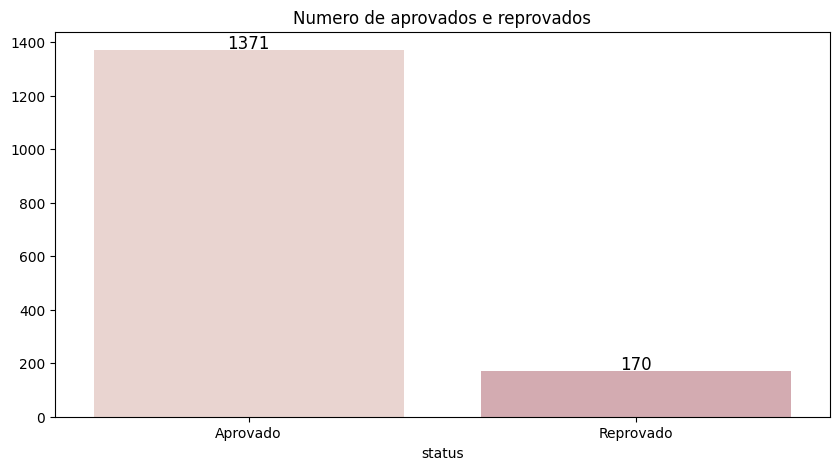

In [37]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df_credit_status['status'].value_counts().index, y=df_credit_status['status'].value_counts().values, palette=paleta)
plt.title('Numero de aprovados e reprovados')
plt.ylabel('')

# Adicionar números acima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points');

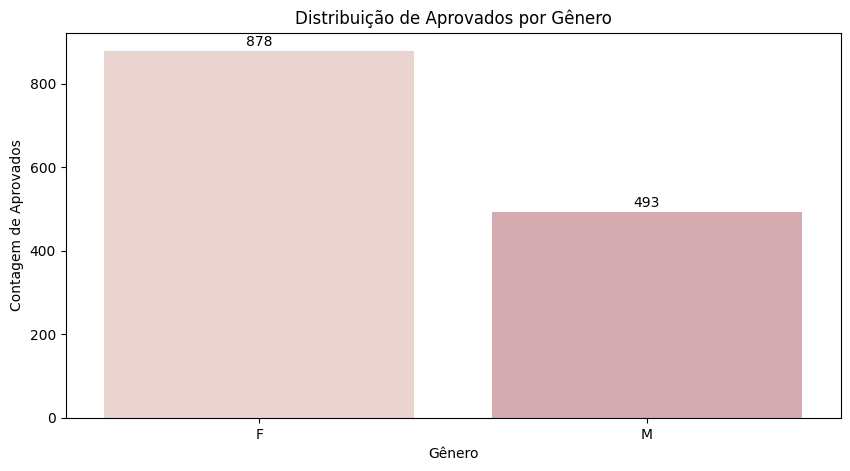

In [38]:
# Filtrando o DataFrame para apenas "Aprovado"
df_aprovados = df_credit_status[df_credit_status['status'] == 'Aprovado']

plt.figure(figsize=(10, 5))
ax = sns.countplot(x='genero', data=df_aprovados, palette=paleta)

# Adicionar rótulos e título
plt.xlabel('Gênero')
plt.ylabel('Contagem de Aprovados')
plt.title('Distribuição de Aprovados por Gênero')

# Adicionar os números um pouco acima das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height + 5), ha='center', va='bottom');


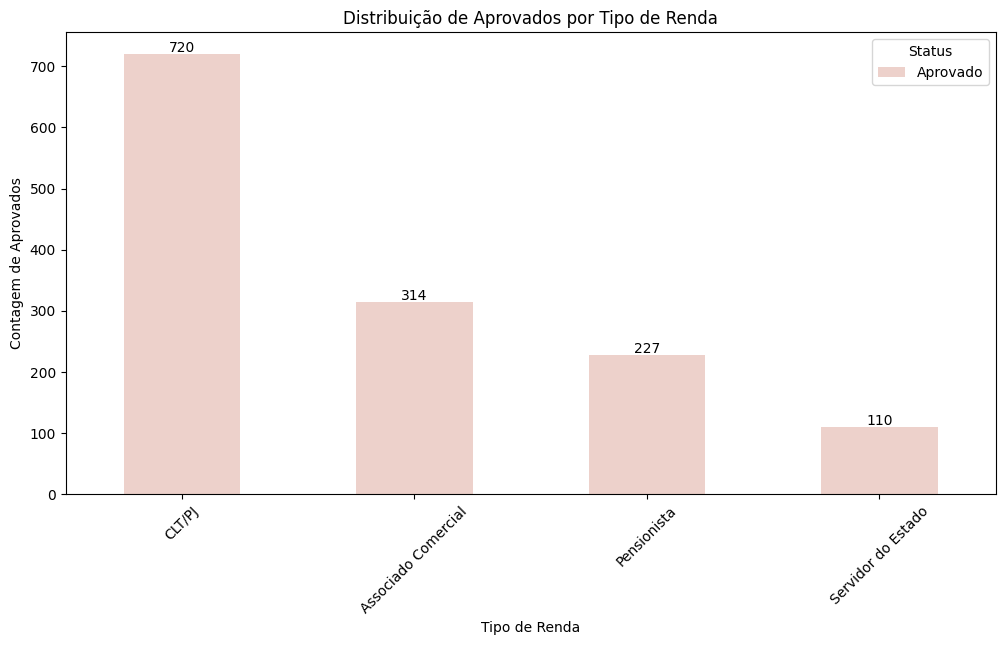

In [39]:
# "Aprovados" por "tipo_renda"
contagem_aprovados = df_aprovados['tipo_renda'].value_counts()

# Criando tabela de contingência (crosstab) entre "tipo_renda" e "status" para os aprovados
crosstab = pd.crosstab(df_aprovados['tipo_renda'], df_aprovados['status'])

# Ordenando as colunas
crosstab = crosstab.sort_values(by='Aprovado', ascending=False)

ax = crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), color=paleta)

# Adicione os números
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height() + 10), ha='center', va='center')

plt.title('Distribuição de Aprovados por Tipo de Renda')
plt.xlabel('Tipo de Renda')
plt.ylabel('Contagem de Aprovados')
plt.xticks(rotation=45)
plt.legend(title='Status');


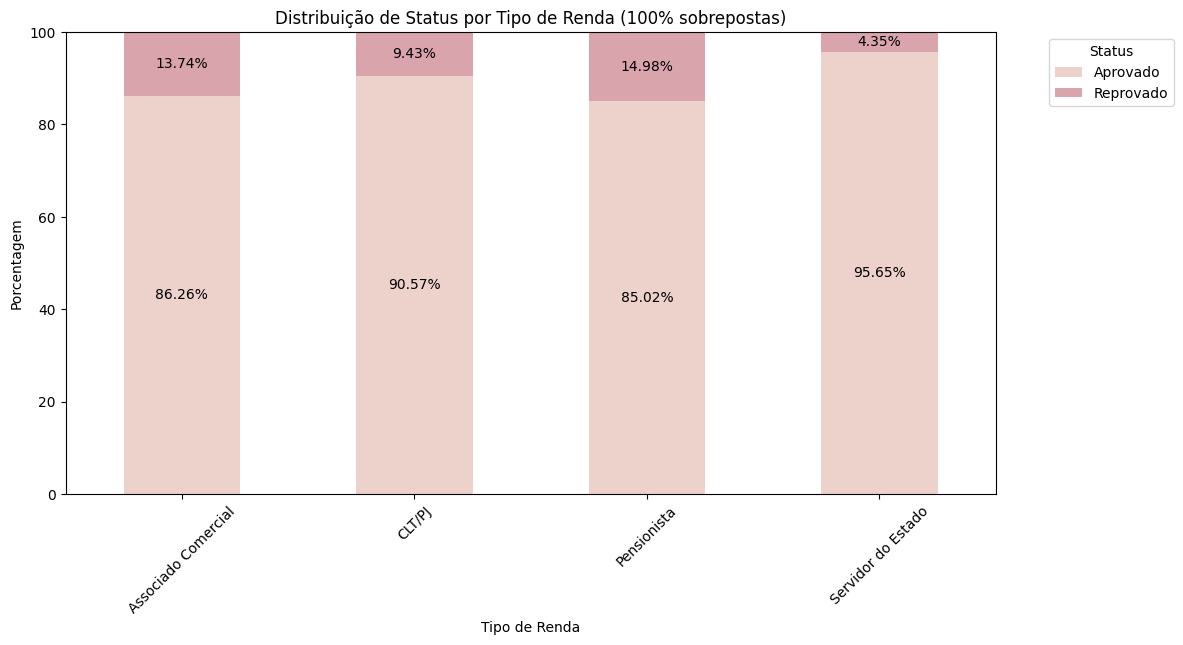

In [40]:
# Tabela de contingência (crosstab) entre "tipo_renda" e "status" para os aprovados
crosstab1 = pd.crosstab(df_credit_status['tipo_renda'], df_credit_status['status'])

# Calcular as porcentagens em relação ao total
crosstab_percent = crosstab1.div(crosstab1.sum(axis=1), axis=0) * 100

# Gráfico de barras empilhadas 100% sobrepostas
ax = crosstab_percent.plot(kind='bar', stacked=True, figsize=(12, 6), color=paleta)

# Adicionando os números no centro das barras com a porcentagem
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height/2), ha='center', va='center')

plt.title('Distribuição de Status por Tipo de Renda (100% sobrepostas)')
plt.xlabel('Tipo de Renda')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)

ax.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 100);


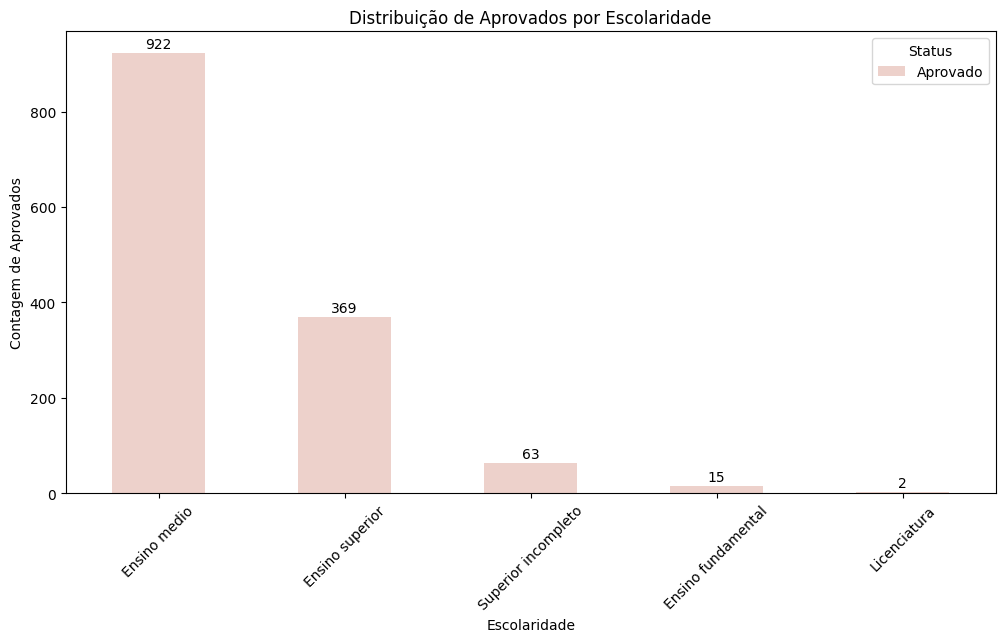

In [41]:
# Criando tabela de contingência (crosstab) entre "escolaridade" e "status"
crosstab2 = pd.crosstab(df_aprovados['escolaridade'], df_aprovados['status'])

# Ordenando as colunas (barras)
crosstab2 = crosstab2.reindex(crosstab2.sum(axis=1).sort_values(ascending=False).index)

# Gráfico de barras
ax = crosstab2.plot(kind='bar', stacked=True, figsize=(12, 6), color=paleta)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height + 5), ha='center', va='bottom')

plt.title('Distribuição de Aprovados por Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Contagem de Aprovados')
plt.xticks(rotation=45)
plt.legend(title='Status');


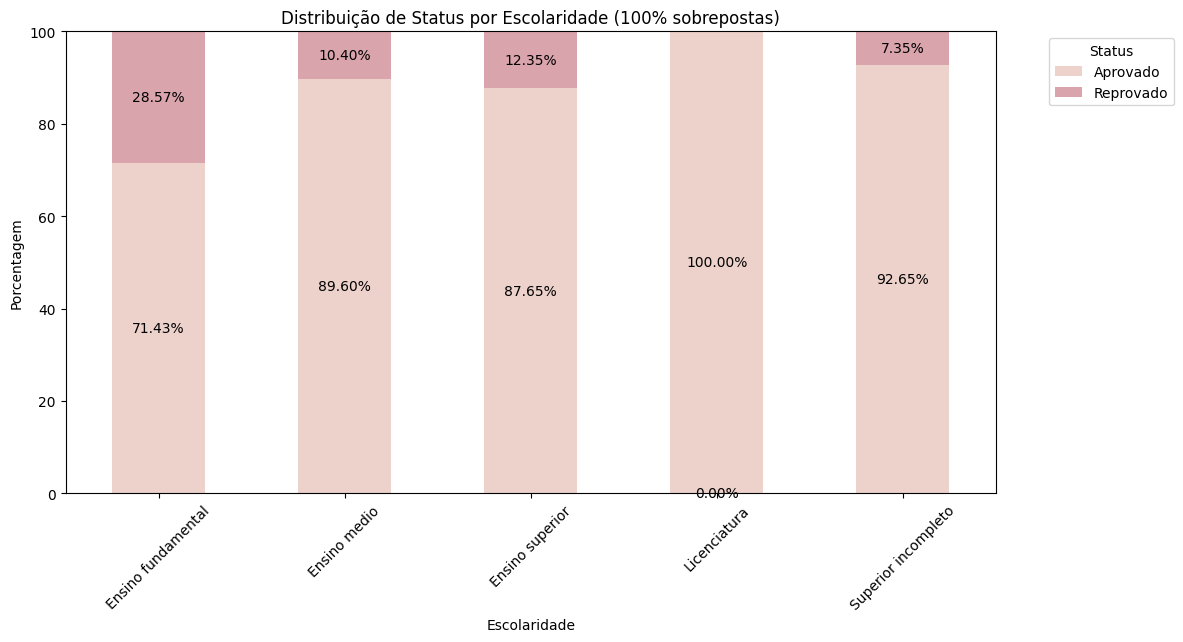

In [42]:
# Crie uma tabela de contingência (crosstab) entre "escolaridade" e "status"
crosstab3 = pd.crosstab(df_credit_status['escolaridade'], df_credit_status['status'])

# Calcular as porcentagens em relação ao total
crosstab_percent = crosstab3.div(crosstab3.sum(axis=1), axis=0) * 100

# Gráfico de barras empilhadas 100% sobrepostas
ax = crosstab_percent.plot(kind='bar', stacked=True, figsize=(12, 6), color=paleta)

# Adicione os números no centro das barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.title('Distribuição de Status por Escolaridade (100% sobrepostas)')
plt.xlabel('Escolaridade')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)

ax.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 100);


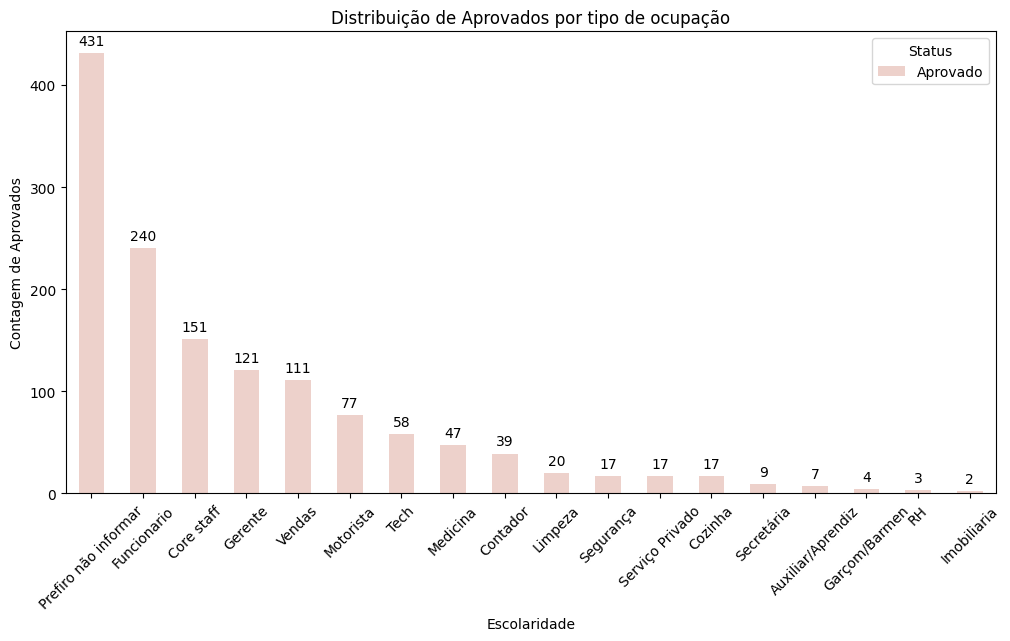

In [43]:
# Criando tabela de contingência (crosstab) entre "tipo_ocupação" e "status"
crosstab4 = pd.crosstab(df_aprovados['tipo_ocupação'], df_aprovados['status'])

# Ordenando as colunas (barras)
crosstab4 = crosstab4.reindex(crosstab4.sum(axis=1).sort_values(ascending=False).index)

# Gráfico de barras
ax = crosstab4.plot(kind='bar', stacked=True, figsize=(12, 6), color=paleta)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height + 5), ha='center', va='bottom')

plt.title('Distribuição de Aprovados por tipo de ocupação')
plt.xlabel('Escolaridade')
plt.ylabel('Contagem de Aprovados')
plt.xticks(rotation=45)
plt.legend(title='Status');

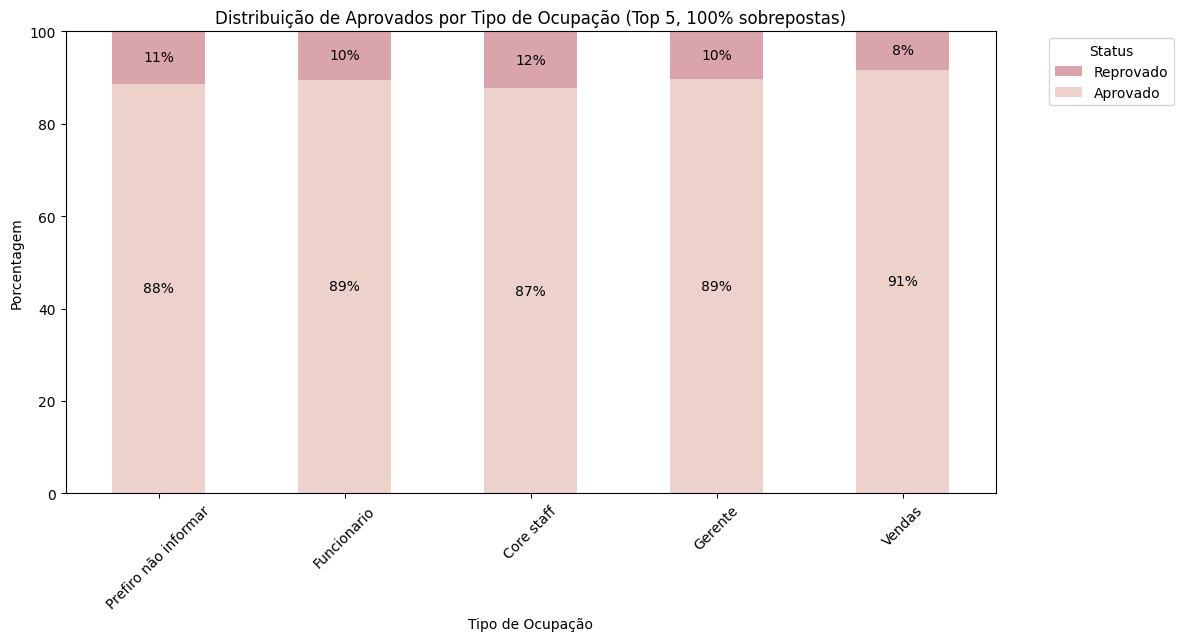

In [44]:
# Tabela de contingência (crosstab) entre "tipo_ocupação" e "status"
crosstab5 = pd.crosstab(df_credit_status['tipo_ocupação'], df_credit_status['status'])

# Ordene as colunas (barras) do DataFrame com base na contagem de "Aprovados"
crosstab5 = crosstab5.reindex(crosstab5.sum(axis=1).sort_values(ascending=False).index)

# Selecionar apenas os top 5 valores
crosstab_top5 = crosstab5.head(5)

# Calcular a porcentagem em relação ao total para o gráfico 100% empilhado
crosstab_percent = crosstab_top5.div(crosstab_top5.sum(axis=1), axis=0) * 100

# Criar um gráfico de barras empilhadas 100% sobrepostas com a paleta de cores definida
ax = crosstab_percent.plot(kind='bar', stacked=True, figsize=(12, 6), color=paleta)

# Adicionar os números no centro das barras
for i in ax.containers:
    ax.bar_label(i, label_type='center', fontsize=10, color='black', labels=[f'{int(v)}%' for v in i.datavalues])

# Personalize o gráfico
plt.title('Distribuição de Aprovados por Tipo de Ocupação (Top 5, 100% sobrepostas)')
plt.xlabel('Tipo de Ocupação')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)
plt.ylim(0, 100)

# Colocar a caixa de legenda fora do gráfico
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Inverter a ordem das categorias na legenda (inverte a ordem dos valores)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title='Status', bbox_to_anchor=(1.05, 1), loc='upper left');

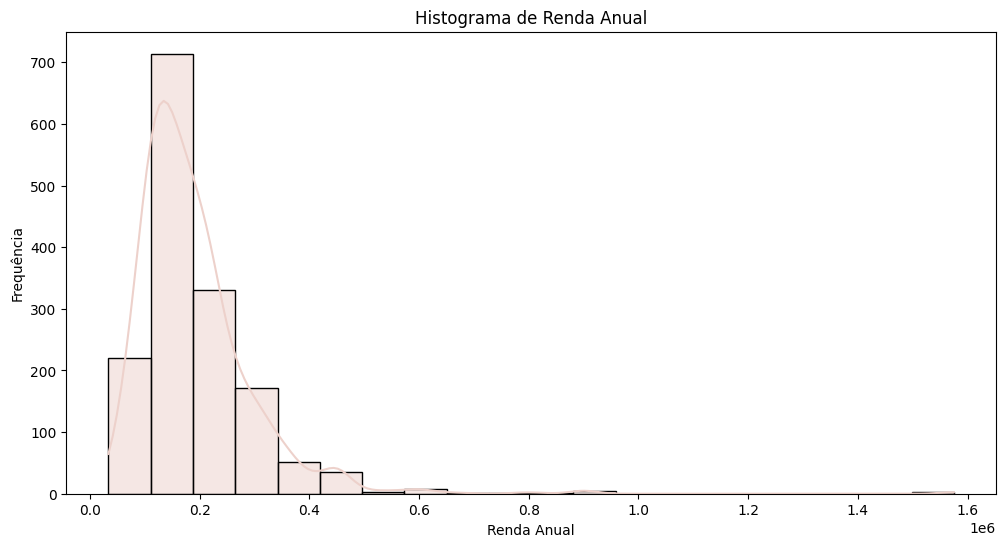

In [45]:
# A paleta de cores do seaborn por ser RGB estava dando erro, entao pesquisei qual era a cor e coloquei o codigo
paleta_rosa_claro = ['#EDD1CB']

# Crie o histograma usando a paleta personalizada
sns.set_palette(sns.color_palette(paleta_rosa_claro))
plt.figure(figsize=(12, 6))
sns.histplot(df_credit_status['renda_anual'], bins=20, kde=True)
plt.xlabel('Renda Anual')
plt.ylabel('Frequência')
plt.title('Histograma de Renda Anual');

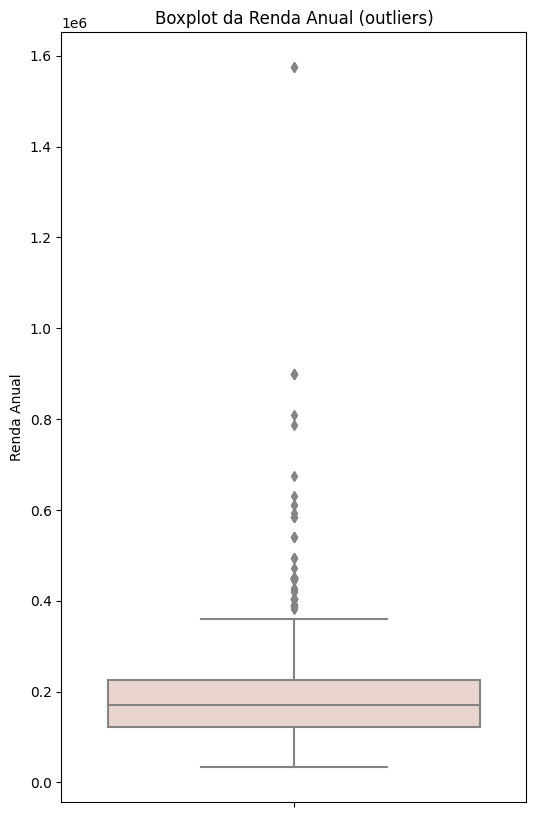

In [46]:
plt.figure(figsize=(6, 10))  # Invertendo a largura e a altura para criar um boxplot vertical
sns.boxplot(y=df_credit_status['renda_anual'], color='#EDD1CB', orient='v') #precisou ser cod da cor porque a paleta RGB estava dando erro
plt.ylabel('Renda Anual')
plt.title('Boxplot da Renda Anual (outliers)');


**Modelagem**
- Selecionar modelos a serem utilizados
- Explicar potenciais benefícios
- Mostrar principais métricas
- Conclusões iniciais

**Optimização de modelo(s)**

- Optimização dos hiperparâmetros, pelo menos um (1) modelo
- Demonstrar de forma clara quais os resultados obtidos

**Conclusões**
- Explicar os principais achados (comparação de métricas e modelos)
- Próximos passos
- Potenciais ganhos para o negócio